# Analysis of Variance: ANOVA

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

## Purpose
**ANOVA** is a statistical *inference* test that compares the means of multiple groups at the same time.
  * *Key Principle*: divide the variance into the variance *between* groups and that *within* groups to see if those distributions match the null hypothesis (H<sub>0</sub>) that all groups come from the same distribution.
  
**Factors/Treatments**: variables that distinguish the different groups
  * Treatment Groups A, B, C, D


### ANOVA vs.  t-tests
An ANOVA test is analogous to carrying out *multiple, separate* **t-tests** for each pair of groups. 
  * *Limitation of multiple t-tests*: increases the chances of false positives as the number of tests increases (**Type I Error*).
    
**t-tests** only work well when dealing with *2* groups*. **ANOVA** should be used to compare *multiple* groups (categorical data with *multiple values*) at the same time.
  * *Example*: Race
    
### F-statistic
`F = variance`<sub>between groups</sub>` / variance`<sub>within groups</sub>

**F-statistic** (*aka F ratio*): the variance ratio used in ANOVA to compare variance.

#### Distribution
Under the null hypothesis, the F-statistic has a F-ratio distribution. Like the t-test approach, if the test-statistic (**F-statistic**) exceeds the critical value for the level of significance (α = 0.05), H<sub>0</sub> is rejected.
  

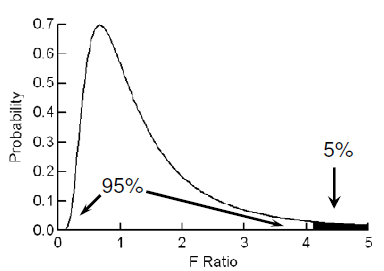

In [2]:
from IPython.display import Image, display
import platform

if platform.system()=='Linux':
    display(Image(filename='/home/cpnguyen/stats_comp_notes/core_topics/anova_dist.png'))
# if platform.system()=='Windows':
#     display(Image(filename='C:\Users\Calvin\Desktop\HS 699\code\hyptest.jpg'))

## Fundamental Technique
### Sum of Squares
**Sum of Squares Total (SST)**: the total variation partitioned into:
   1. **SSA**: among-group variation
   2. **SSW**: within-group variation
   
**`SST = SSA + SSW`**

### Mean Squares
Three variances, called **Mean Square** terms, are extracted by dividing each of the component *Sum of Squares* by their respective degrees of freedom.

  * **Mean Square Among (MSA)** = SSA/(c-1)
  * **Mean Square Within (MSW)** = SSW/(n-c)
  * **Mean Square Total (MST)** = SST/ (n-1)

If H<sub>0</sub> is *true*, then all three **mean squares** provide an estimate of the overall variance of the data.

##### ANOVA Degrees of Freedom (df)
df<sub>ANOVA</sub> = `c-1`
  * `c`: the number of groups
  


## One-Way ANOVA
**Purpose**: Test whether the mean of some *numeric* variable differs across the levels of one *categorical variable*.
  * Answers the question: *Do any of the group means differ from one another?*
  * Measures the effect and itneraction of one predictor factor on the response.

http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html
http://www.randalolson.com/2012/08/06/statistical-analysis-made-easy-in-python/

### Test Statistic: F-statistic<sub>one-way</sub>
`F-statistic = MSA / MSW`

#### Output
  * H<sub>0</sub> is *true*: **F-statistic** = 1.0
  * H<sub>0</sub> is *false*: **F-statistic** > 1.0

### SciPy Package: `f_oneway()`
https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.f_oneway.html  
`scipy.stats.f_oneway(group1, group2, ..., groupn)`

### StatsModels Package: `anova_lm`

`statsmodels.stats.anova.anova_lm()`

### Example: Average Voter Age Across Race
Compare the mean average age of voters across race (*categorical variable*).

Hypotheses
  * **H<sub>0</sub>**: The sample mean points to a population where the population mean is μ so that μ<sub>A</sub> = μ<sub>B</sub> = μ<sub>C</sub> = μ<sub>D</sub>.
  * **H<sub>A</sub>**: The sample mean points to a population where the population mean is not μ so that μ<sub>A</sub> ≠ μ<sub>B</sub> ≠ μ<sub>C</sub> ≠ μ<sub>D</sub>.

In [3]:
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups

# Etract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

The one-way ANOVA test yields a **F-statistic** of 1.774 and **p-value** of 0.1317. Thus, indicating that there's no significant difference between the means of the group.